***YAĞMUR*** ***TAHMİNİ***

---



Bu projede kullanacağımız veri seti, çok sayıda     Avustralya hava istasyonu günlük hava     gözlemlerini içerir. 
Hedefimiz: Ertesi gün yağmur yağdı mı? Evet veya     Hayır. 
Bu veriye     https://www.kaggle.com/jsphyg/weather-dataset-rattle-package     ulaşabilirsiniz.Ya sitesinden da     https://raw.githubusercontent.com/amounsey/AustraliaRainPrediction/master/data/weather.csv     sitesinden veriyi çekebilrsiniz Ayrıca  kaggle'da bulunan     https://www.kaggle.com/prashant111/extensive-analysis-eda-fe-modelling     ve     https://www.kaggle.com/aninditapani/will-it-rain-tomorrow     arasında olduğu de yararlandık . 


# Verinin yüklenmesi ve düzenlenmesi

Verimizi yüklemek ve incelemek için gerekli kütüphaneleri kuralım.

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
data = pd.read_csv("https://raw.githubusercontent.com/amounsey/AustraliaRainPrediction/master/data/weather.csv")

Verimizin boyutlarına bakalım.

In [8]:
data.shape

(142193, 24)

Verimize bir göz atalım.

In [9]:
data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,01/12/2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,02/12/2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,03/12/2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,04/12/2008,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,05/12/2008,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,20/06/2017,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,E,15.0,13.0,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0.0,No
142189,21/06/2017,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0.0,No
142190,22/06/2017,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0.0,No
142191,23/06/2017,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0.0,No


RISK MM ertesi gün için milimetre cinsinden yağış miktarlarını içerir.Yağmur, çiseleme, dolu ve kar gibi yere ulaşan her türlü yağış türünü içerir.Biz ise sadece yağmur yağışını tahmin ettiğimizden bu kolonu çıkarıyoruz.

In [10]:
data.drop(['RISK_MM'], axis=1, inplace=True)

Nan değerlerimi verimizden çıkartalım.

In [11]:
data = data.dropna(how='any')
data.shape

(56420, 23)

Verimizin türlerine bakalım.

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56420 entries, 5939 to 139112
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           56420 non-null  object 
 1   Location       56420 non-null  object 
 2   MinTemp        56420 non-null  float64
 3   MaxTemp        56420 non-null  float64
 4   Rainfall       56420 non-null  float64
 5   Evaporation    56420 non-null  float64
 6   Sunshine       56420 non-null  float64
 7   WindGustDir    56420 non-null  object 
 8   WindGustSpeed  56420 non-null  float64
 9   WindDir9am     56420 non-null  object 
 10  WindDir3pm     56420 non-null  object 
 11  WindSpeed9am   56420 non-null  float64
 12  WindSpeed3pm   56420 non-null  float64
 13  Humidity9am    56420 non-null  float64
 14  Humidity3pm    56420 non-null  float64
 15  Pressure9am    56420 non-null  float64
 16  Pressure3pm    56420 non-null  float64
 17  Cloud9am       56420 non-null  float64
 18  Cl

Verimizdeki tarih değerlerini pandas kütüphanesinin datetime sınıfına dönüştürelim.

In [13]:
data['Date'] = pd.to_datetime(data['Date'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Kolonların maksimum ve minimum değerlerine göz atalım.

In [14]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000
mean,13.464770,24.219206,2.130397,5.503135,7.735626,40.877366,15.667228,19.786778,65.874123,49.601985,1017.239505,1014.795580,4.241705,4.326515,18.204961,22.710333
std,6.416689,6.970676,7.014822,3.696282,3.758153,13.335232,8.317005,8.510180,18.513289,20.197040,6.909357,6.870892,2.797162,2.647251,6.567991,6.836543
min,-6.700000,4.100000,0.000000,0.000000,0.000000,9.000000,2.000000,2.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-0.700000,3.700000
25%,8.600000,18.700000,0.000000,2.800000,5.000000,31.000000,9.000000,13.000000,55.000000,35.000000,1012.700000,1010.100000,1.000000,2.000000,13.100000,17.400000
50%,13.200000,23.900000,0.000000,5.000000,8.600000,39.000000,15.000000,19.000000,67.000000,50.000000,1017.200000,1014.700000,5.000000,5.000000,17.800000,22.400000
75%,18.400000,29.700000,0.600000,7.400000,10.700000,48.000000,20.000000,26.000000,79.000000,63.000000,1021.800000,1019.400000,7.000000,7.000000,23.300000,27.900000
max,31.400000,48.100000,206.200000,81.200000,14.500000,124.000000,67.000000,76.000000,100.000000,100.000000,1040.400000,1038.900000,8.000000,9.000000,39.400000,46.100000


# Verinin görselleştirilmesi ve incelenmesi

Verimizde kaç kere yağmur yağmış bir bakalım.  

In [15]:
data["RainToday"].value_counts()

No     43958
Yes    12462
Name: RainToday, dtype: int64

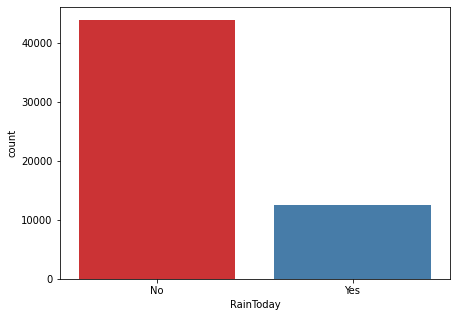

In [16]:
f , ax = plt.subplots(figsize=(7, 5))
ax = sns.countplot(x=data["RainToday"],data=data,palette="Set1")
plt.show()

Verilerin hangi şehirlerden ne kadar alındığına bakalım.Verimizdeki Nan değerleri temizlediğimizden bazı şehirlerde az veri kalmıştır.

Text(0.5, 1.0, 'Count plot: Location')

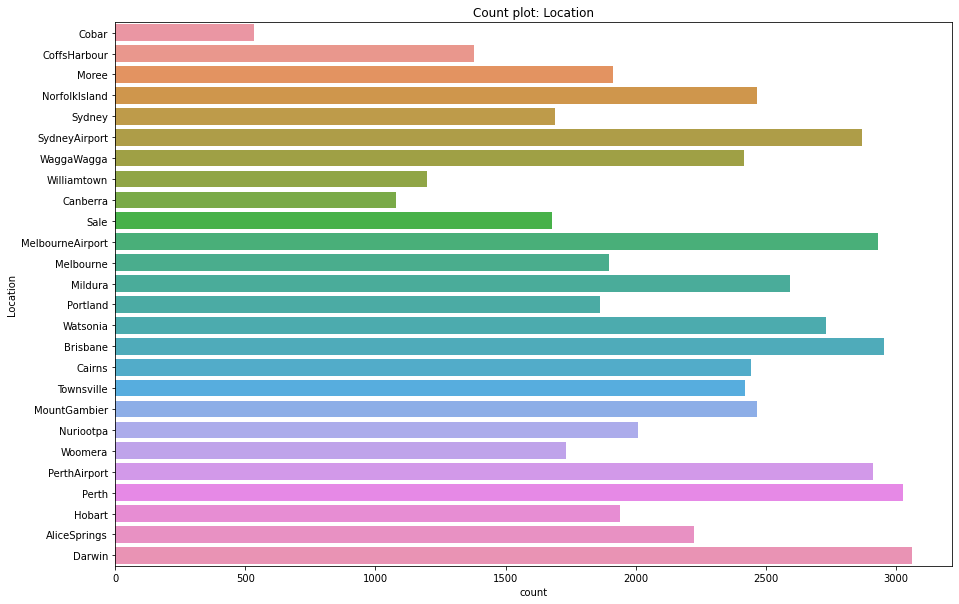

In [17]:
plt.figure(figsize=(15,10))
sns.countplot(y="Location", data=data)
plt.title("Count plot: Location")

Şimdi özelliklerin dağılımını çizdirelim.

-Havadaki bulutların oranının değerleri 0 ile 8 arasında tam sayılarla değiştiğinden böyle bir grafik çıkmıştır.

-Yağış miktarının 0 olduğu yerde çok veri olduğundan ve yağış miktarının 0 dan fazla olduğu yerlerde bütün değerler genelde farklı olduğundan grafik böyledir.

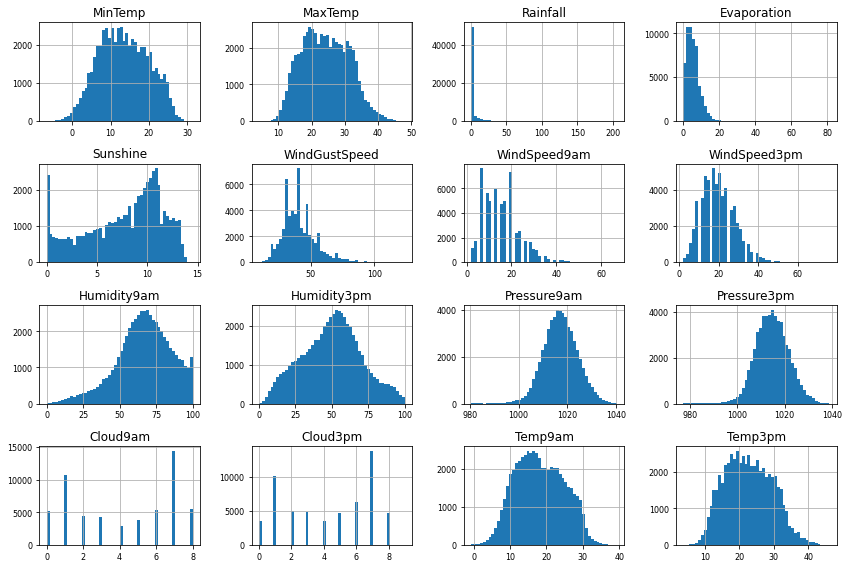

In [18]:
data.hist(bins=50, xlabelsize = 8, ylabelsize = 8)
plt.tight_layout(rect=(0, 0, 2, 2))

Bazı özelliklerin violin grafiğini çizdirelim.

-Genelde gün içindeki güneş ışığının saat sayısı arttıkça yağmurun yağmadı 
gözüküyor.

-Nem yüzdesine baktığımızda %50 nin üstünde olan değerlerde genelde yağmur yağdığı gözüküyor.

-Ortalama deniz seviyesindeki atmosferik basınca baktığımızda yağmurun yağdığı günlerde 1005-1015 arasında seyrediyor.

-Gün içindeki en güçlü rüzgarın hızı 40km/s ve 80km/s i geçtiğinde  genelde yağmur yağdığı gözüküyor.

Text(0.5, 1.0, 'Violin plot: Pressure3pm')

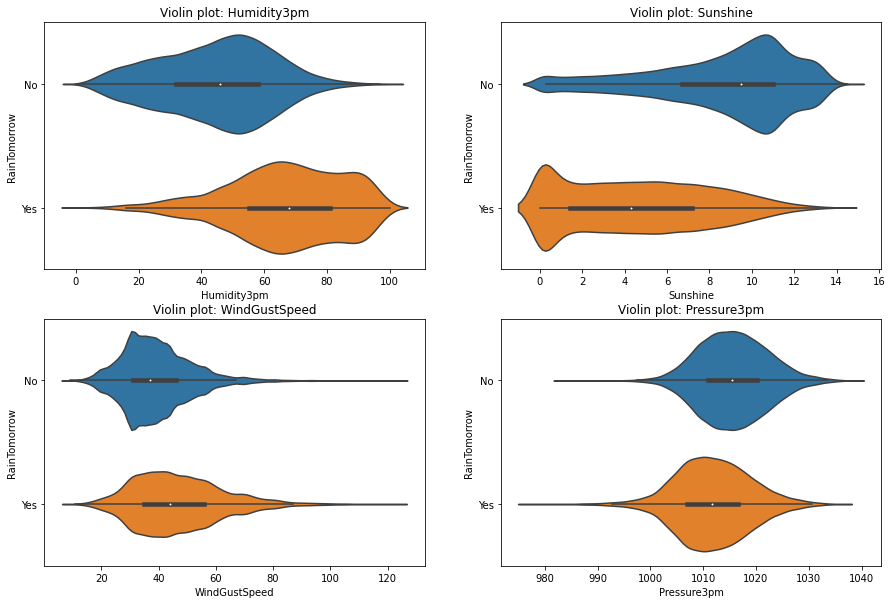

In [19]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x="Humidity3pm", y="RainTomorrow", data=data)
plt.title("Violin plot: Humidity3pm")
plt.subplot(2,2,2)
sns.violinplot(x="Sunshine", y="RainTomorrow", data=data)
plt.title("Violin plot: Sunshine")
plt.subplot(2,2,3)
sns.violinplot(x="WindGustSpeed", y="RainTomorrow", data=data)
plt.title("Violin plot: WindGustSpeed")
plt.subplot(2,2,4)
sns.violinplot(x="Pressure3pm", y="RainTomorrow", data=data)
plt.title("Violin plot: Pressure3pm")

Havadaki bulut oranının yağmur yağmasına etkisine bakalım.Bu grafikte genelde havadaki bulut oranı değeri genelde 5 ile 8 arasındaki değerlerde yağmur yağdığı gözüküyor.

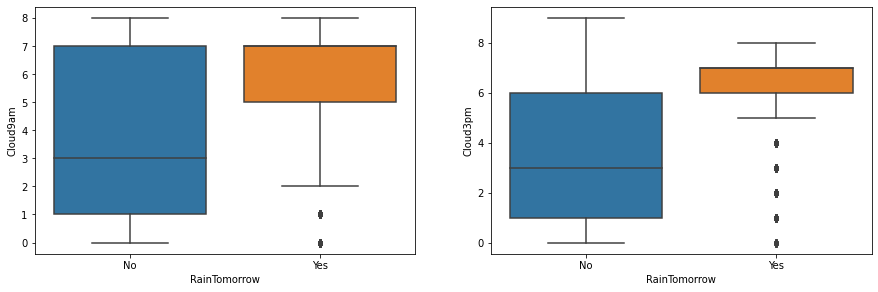

In [20]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.boxplot(x ='RainTomorrow', y = 'Cloud9am', data = data)
plt.subplot(2,2,2)
sns.boxplot(x ='RainTomorrow', y = 'Cloud3pm', data = data)

Sıcaklık ile yağmur yağma miktarı arasındaki grafiği çizdirelim.Fazla yağmur yağan günler belirli sıcaklık aralığında dağılıyor gibi.En çok yağış alan günler 20-30 derece aralığında olduğu gözüküyor.

Text(0, 0.5, 'Rainfall')

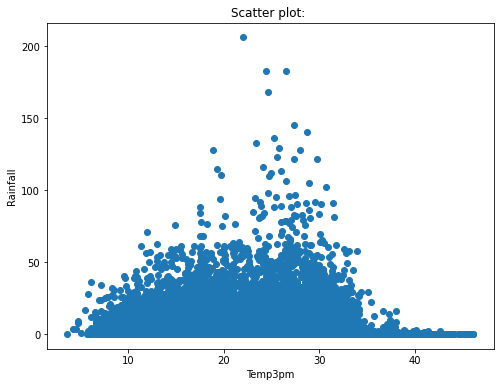

In [21]:
x = data['Temp3pm']
y = data['Rainfall']
plt.figure(figsize=(8, 6))
plt.scatter(x,y)
plt.title("Scatter plot: ")
plt.xlabel("Temp3pm")
plt.ylabel("Rainfall")

-Güneş ışığının saat sayısı azaldıkça ve nem arttıkça yağmurun yağma olasılığı artıyor.

-Buharlaşma 15mm den az olduğunda ve güneş ışığının saat sayısı azaldıkça yağmurun yağma olasılığının arttığını görüyoruz.

-Havadaki bulut oranı arttıkça ve atmosferik basınç 1010 dan azsa yağmur yağma olsaılığı artıyor.

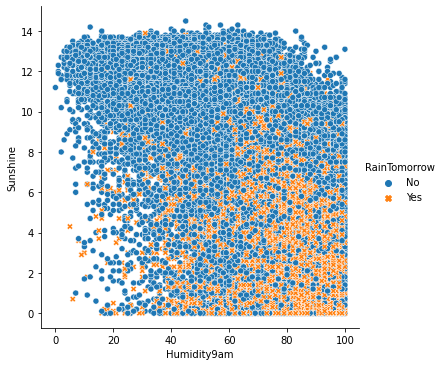

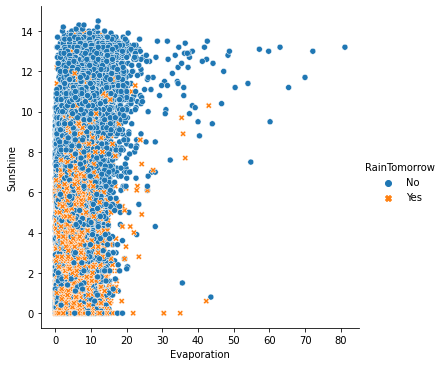

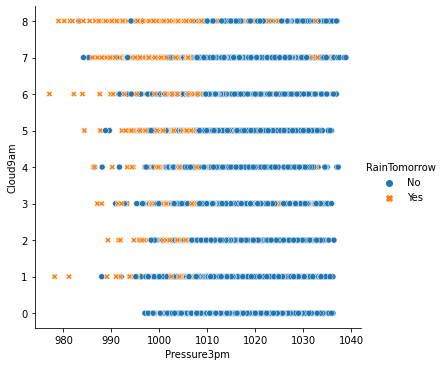

In [22]:
sns.relplot(x = "Humidity9am", y = "Sunshine", hue = "RainTomorrow", style = "RainTomorrow", data = data);
sns.relplot(x = "Evaporation", y = "Sunshine", hue = "RainTomorrow", style = "RainTomorrow", data = data);
sns.relplot(x = "Pressure3pm", y = "Cloud9am", hue = "RainTomorrow", style = "RainTomorrow", data = data);

Bütün özelliklerin arasındaki ilişkiyi inceleyelim.
Korelasyon grafiğimize baktığımız zaman kıyasladığımız etmenlerin birbiri ile olan ilişkilerinin yağmur yağma ihtimaline karşı etkisini gözlemliyoruz.

-Örneğin yağış miktarına ve sabah 9 daki basıncın arttığımız zaman yağmur yağma ihtimalinin düşük oluyor.

-Yağış miktarının havadaki nem ve bulutluluk oranına baktığımız zaman ise yağmur yağma ihtimalinin arttığını görüyoruz.

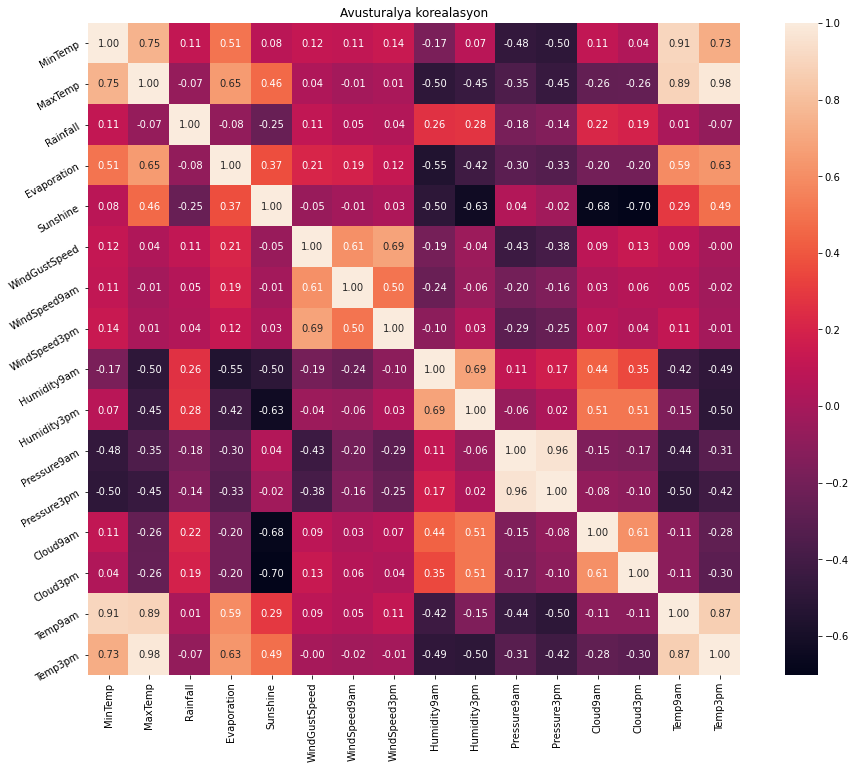

In [23]:
korelasyon = data.corr()
plt.figure(figsize=(16,12))
plt.title('Avusturalya korealasyon')
ax = sns.heatmap(korelasyon,square=True,annot=True,fmt='.2f',linecolor='white')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_yticklabels(ax.get_yticklabels(),rotation=30)
plt.show()

Modellememizde kullanıcağımız veriler sayı olması gerektiğinden ve rüzgar yönleri string bilgileri olduğundan onları category türüne çevirip sayısal bilgiler haline getiriyoruz.

In [24]:
data_copy = data.copy()
data_copy.WindDir9am = pd.Categorical(data_copy.WindDir9am)#convert to categorical data
print(data_copy.WindDir9am.unique())
data_copy.WindDir9am = data_copy.WindDir9am.cat.codes

data_copy.WindGustDir = pd.Categorical(data_copy.WindGustDir)#convert to categorical data
print(data_copy.WindGustDir.unique())
data_copy.WindGustDir = data_copy.WindGustDir.cat.codes

data_copy.WindDir3pm = pd.Categorical(data_copy.WindDir3pm)#convert to categorical data
print(data_copy.WindDir3pm.unique())
data_copy.WindDir3pm = data_copy.WindDir3pm.cat.codes


['ENE', 'SSE', 'NNE', 'WNW', 'NW', ..., 'E', 'NNW', 'ESE', 'WSW', 'SW']
Length: 16
Categories (16, object): ['ENE', 'SSE', 'NNE', 'WNW', ..., 'NNW', 'ESE', 'WSW', 'SW']
['SSW', 'S', 'NNE', 'WNW', 'N', ..., 'WSW', 'NNW', 'ESE', 'SSE', 'NW']
Length: 16
Categories (16, object): ['SSW', 'S', 'NNE', 'WNW', ..., 'NNW', 'ESE', 'SSE', 'NW']
['SW', 'SSE', 'NNW', 'WSW', 'WNW', ..., 'E', 'ESE', 'NE', 'SSW', 'W']
Length: 16
Categories (16, object): ['SW', 'SSE', 'NNW', 'WSW', ..., 'ESE', 'NE', 'SSW', 'W']


Yukarıda yaptığımız işlemi yağmur yağıp yağmayadığını ifade eden kolonları da sayısal bilgi halline getiriyoruz. 

In [25]:
data_copy['RainToday'].replace({'No':0,'Yes':1},inplace=True)
data_copy['RainTomorrow'].replace({'No':0,'Yes':1},inplace=True)

# Özellikler ile yağış tahmini arasındaki ilişkiyi modelleme

Modellememiz için gereken kütüphaneleri kuralım.

In [26]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

Verimizi tahmin edeceğimiz kolon ve hangi kolonlora göre tahmin edeceksek o kolonlara göre ayıralım.

In [27]:
X = data_copy.drop(['RainTomorrow','Location','Date'],axis=1)
y= data_copy['RainTomorrow']

Verimizin bir kısmını modellemek için bir kısmını test için ayıralım.

In [28]:
X_train,X_test,y_train,y_test = train_test_split(X , y , test_size = 0.2, random_state = 42)

Verimizde kolonlardaki değerlerin bazıları düşük bazıları yüksek olduğundan normalizasyon yapalım. 

In [29]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Birden fazla sınıflandırıcı ile test edelim.

In [30]:
names=["Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA","Nearest Neighbors",
          "Linear SVM", 
         "Decision Tree"]
classifiers=[RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
       MLPClassifier(alpha=1, max_iter=1000),
       AdaBoostClassifier(),
       GaussianNB(),
       QuadraticDiscriminantAnalysis() ,
      KNeighborsClassifier(3),
      SVC(kernel="linear", C=0.025),
      DecisionTreeClassifier(max_depth=5)]
for name, clf in zip(names, classifiers):
        print(name,":")
        clf.fit(X_train, y_train)
        pred = clf.predict(X_test)
        print(classification_report(y_test,pred))
        print(confusion_matrix(y_test,pred)) 
mlp = MLPClassifier().fit(X_train, y_train)
en_iyi = mlp.predict(X_test)

Random Forest :
              precision    recall  f1-score   support

           0       0.82      0.99      0.90      8799
           1       0.83      0.24      0.37      2485

    accuracy                           0.82     11284
   macro avg       0.83      0.61      0.64     11284
weighted avg       0.82      0.82      0.78     11284

[[8679  120]
 [1886  599]]
Neural Net :
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      8799
           1       0.75      0.53      0.62      2485

    accuracy                           0.86     11284
   macro avg       0.81      0.74      0.77     11284
weighted avg       0.85      0.86      0.85     11284

[[8361  438]
 [1159 1326]]
AdaBoost :
              precision    recall  f1-score   support

           0       0.87      0.94      0.91      8799
           1       0.72      0.51      0.60      2485

    accuracy                           0.85     11284
   macro avg       0.80      0.73 

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


En iyi tahminde bulunanı seçelim ve gerçek değer ile tahmin ettiğimiz değerlerin  grafiğini çizdirelim.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


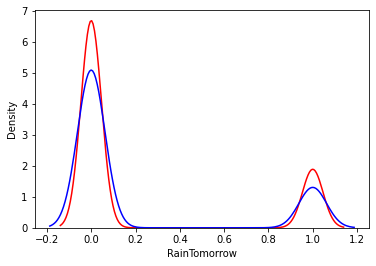

In [31]:
ax1 = sns.distplot(data_copy['RainTomorrow'],hist=False,color='r',label='Gerçek değer')
sns.distplot(en_iyi,hist=False,color='b',label='Kestirilen değer',ax=ax1)

# Eğitilen modelin test edilmesi ve Haritalandırma

Avusturalya şehirlerinin koordinat verilerini alalım.Bu verileri https://raw.githubusercontent.com/Elkfox/Australian-Postcode-Data/master/au_postcodes.csv sitesinden aldık.

In [32]:
location = pd.read_csv("https://raw.githubusercontent.com/Elkfox/Australian-Postcode-Data/master/au_postcodes.csv")
location = location[['place_name','latitude','longitude']]
location

,place_name,latitude,longitude
0,Australian National University,-35.2777,149.1189
1,Barton,-35.3049,149.1412
2,Wreck Bay,-35.1627,150.6907
3,Hmas Creswell,-35.0280,150.5501
4,Jervis Bay,-35.1333,150.7000
...,...,...,...
16870,Maddington,-32.0500,115.9833
16871,Gosnells,-32.0810,116.0054
16872,Kelmscott,-32.1243,116.0259
16873,Armadale,-32.1461,116.0093


Şimdi belirli bir tarihteki yağış tahminlerini modellememize tahmin ettirelim.

In [33]:
#Belirli bir tarihteki verileri alalım
tahmin_edilecekler = data[data['Date']=='2015-02-05']

#Koordinat verilerinin olduğu verilerden bizim seçtiğimiz şehirleri bulalım
a = tahmin_edilecekler['Location'].isin(location['place_name'])
b = a[a.values==False].index

#Elimizde koordinatı olmayan şehirleri atalım.
for i in b:
  tahmin_edilecekler.drop(labels=i,inplace=True)

#Koordinatı olan şehirleri bir listeye aktaralım.
sehirler=[]
for j in tahmin_edilecekler.index:
  sehirler.append(tahmin_edilecekler['Location'][j])

#Sayısal olmayan bilgileri sayısal verilere dönüştürelim.
tahmin_edilecekler.WindDir9am = pd.Categorical(tahmin_edilecekler.WindDir9am)
tahmin_edilecekler.WindDir9am = tahmin_edilecekler.WindDir9am.cat.codes

tahmin_edilecekler.WindGustDir = pd.Categorical(tahmin_edilecekler.WindGustDir)
tahmin_edilecekler.WindGustDir = tahmin_edilecekler.WindGustDir.cat.codes

tahmin_edilecekler.WindDir3pm = pd.Categorical(tahmin_edilecekler.WindDir3pm)
tahmin_edilecekler.WindDir3pm = tahmin_edilecekler.WindDir3pm.cat.codes

tahmin_edilecekler['RainToday'].replace({'No':0,'Yes':1},inplace=True)
tahmin_edilecekler['RainTomorrow'].replace({'No':0,'Yes':1},inplace=True)

X = tahmin_edilecekler.drop(['RainTomorrow','Date'],axis=1)
y = tahmin_edilecekler['RainTomorrow']

tahmin_edilecekler.sort_values(by=['Location'],inplace=True)

X.drop(['Location'],axis=1,inplace=True)


Xnew = X
Xnew = sc.transform(Xnew)
ynew = mlp.predict(Xnew)
#Bakalım tahminlerimiz doğru mu?
print(y)
print(ynew)

32048     1
70401     0
74970     1
77974     0
84081     0
87105     0
93076     0
120114    0
129077    1
138328    0
Name: RainTomorrow, dtype: int64
[1 0 1 0 0 0 0 0 1 0]


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=me

In [34]:
data[data['Date']=='2015-02-05']

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
22840,2015-02-05,NorfolkIsland,18.3,21.4,0.2,5.2,1.2,E,54.0,E,ENE,28.0,28.0,65.0,79.0,1027.0,1024.0,8.0,7.0,20.4,19.8,No,Yes
32048,2015-02-05,Sydney,16.6,23.0,8.6,2.6,2.3,ESE,52.0,ESE,NE,20.0,17.0,79.0,95.0,1020.6,1016.5,7.0,7.0,21.7,19.0,Yes,Yes
35057,2015-02-05,SydneyAirport,16.3,23.6,10.4,2.6,2.3,ENE,50.0,ESE,E,19.0,20.0,77.0,92.0,1020.8,1016.6,7.0,7.0,21.5,19.6,Yes,Yes
38062,2015-02-05,WaggaWagga,9.8,23.1,0.0,3.8,6.3,ENE,33.0,E,ENE,11.0,13.0,71.0,45.0,1021.8,1017.0,7.0,4.0,14.9,22.9,No,No
64959,2015-02-05,MelbourneAirport,11.6,22.5,0.0,5.4,4.1,N,59.0,N,N,28.0,30.0,62.0,47.0,1019.2,1014.8,7.0,2.0,15.6,21.4,No,No
70401,2015-02-05,Mildura,12.9,24.4,0.0,2.4,9.0,WNW,30.0,NW,W,9.0,17.0,72.0,27.0,1020.0,1016.2,2.0,1.0,17.1,24.2,No,No
74970,2015-02-05,Portland,10.9,16.9,0.4,2.2,5.4,WNW,54.0,NNW,NW,22.0,24.0,79.0,81.0,1014.7,1013.4,8.0,2.0,14.2,16.6,No,Yes
77974,2015-02-05,Watsonia,9.6,21.7,0.0,5.4,4.1,N,39.0,NE,N,6.0,19.0,65.0,51.0,1019.2,1014.8,7.0,2.0,16.7,21.4,No,No
84081,2015-02-05,Brisbane,16.6,24.9,182.6,1.6,9.5,SSW,19.0,WNW,WSW,6.0,7.0,71.0,58.0,1013.0,1010.0,1.0,1.0,19.8,24.4,Yes,No
87105,2015-02-05,Cairns,18.9,29.0,0.0,4.6,10.3,N,22.0,E,NNE,7.0,13.0,69.0,69.0,1014.6,1010.8,6.0,6.0,25.4,27.4,No,No


Seçtiğimiz şehirler hariç geri kalan şehirleri koordinat verimizten çıkartalım.

In [35]:
a = location['place_name'].isin(sehirler)
for i in a.index:
  if a[i]==False:
    location.drop(i,inplace=True)

Bazı şehirlerden birden fazla satır var.O satırları silelim.

In [36]:
location.drop_duplicates('place_name',keep='first',inplace=True)

İndeksleri 0 dan başlayarak satır sayısına kadar değiştirelim.

In [37]:
location = location.reset_index()

Tahmin ettiğimiz şehirler ile koordinatların uyuşması için alfabetik olarak sıralayalım.

In [38]:
location.sort_values(by=['place_name'],inplace=True)

In [39]:
location

,index,place_name,latitude,longitude
3,5644,Brisbane,-27.4679,153.0281
5,8772,Cairns,-16.9230,145.7663
2,5278,Darwin,-12.4611,130.8418
6,10886,Hobart,-42.8794,147.3294
9,13350,Mildura,-34.1855,142.1625
7,11423,Perth,-41.5723,147.1710
1,5053,Portland,-33.3571,149.9815
0,154,Sydney,-33.8678,151.2073
4,8411,Townsville,-19.2664,146.8057
8,11908,Watsonia,-37.7167,145.0833


Şimdi de şehirlerimizin tahminlerini harita üzerinde görelim.Yağmur yağan yerleri yağmur resmi ile yağmur yağmayan yerleri güneş resmi ile gösterelim.

In [40]:
import folium
loca = location['latitude'].mean(),location['longitude'].mean()
m = folium.Map(location=loca,zoom_start=4)
for i in range(0,len(location)):
  if ynew[i]==1:
    folium.Marker([location['latitude'].iloc[i],location['longitude'].iloc[i]],icon=folium.CustomIcon('https://png.pngtree.com/png-vector/20190822/ourlarge/pngtree-rain-icon-sky-filled-with-cartoon-clouds-png-image_1699315.jpg',icon_size=(30,30))).add_to(m)
  else:
    folium.Marker([location['latitude'].iloc[i],location['longitude'].iloc[i]],icon=folium.CustomIcon('https://previews.123rf.com/images/helena777/helena7771908/helena777190800148/128804415-flat-sun-icon-summer-pictogram-on-transparent-background-sunlight-symbol-.jpg',icon_size=(30,30))).add_to(m)  
m

# Yeni verilerle test etme

Avusturalyanın Sydney şehrinin Temmuz 2020 tarihine ait verileri http://www.bom.gov.au/climate/dwo/202007/html/IDCJDW2124.202007.shtml sitesinden aldık.İndirdiğimiz dosyada biraz değişiklik yaptık.Dosyada üst kısımlarda yazılan bilgi yazılarını sildik.Bakalım modellememiz bu yeni verilerde yağmuru nasıl tahmin ediyor.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

In [192]:
yeni = pd.read_csv("/content/drive/MyDrive/IDCJDW2124.202007.csv", encoding= 'unicode_escape')
yeni.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,Time of maximum wind gust,Temp9am,Humidity9am,Cloud9am,WindDir9am,WindSpeed9am,Pressure9am,Temp3pm,Humidity3pm,Cloud3pm,WindDir3pm,WindSpeed3pm,Pressure3pm
0,2020-07-1,7.9,22.8,0.0,1.4,8.9,W,28,05:49,11.2,87,1,W,22,1022.1,21.4,44,1,E,6,1017.8
1,2020-07-2,11.2,22.9,NaN,3.4,9.2,NNW,54,12:41,17.6,58,1,NNW,22,1016.1,21.3,46,3,NNW,35,1013.2
2,2020-07-3,10.4,18.7,0.0,3.6,8.2,W,37,17:20,12.9,64,1,WNW,11,1020.8,18.5,40,2,W,19,1017.8
3,2020-07-4,8.7,17.1,1.6,3.8,7.6,W,52,21:41,9.3,88,6,W,17,1019.7,16.0,40,1,SW,2,1018.6
4,2020-07-5,8.5,19.1,0.2,3.4,8.6,W,39,09:53,11.2,67,1,W,20,1022.1,17.4,43,2,SSE,13,1021.1


In [193]:
yeni = yeni.dropna(how='any')
yeni.shape

(28, 21)

In [194]:
yeni = yeni.reset_index(drop=True)

In [195]:
yeni = yeni.drop(['Time of maximum wind gust'],axis=1)

Tarih kolonunu modellememize vermiyeceğimiz için siliyoruz.

In [196]:
yeni.drop(['Date'], axis=1, inplace=True)

Aldığımız veride RainToday kolonu olmadığı için onu kenimiz oluşturuyoruz.RainFall kolonunda 1 den yani günlük yağış miktarı 1mmden küçük ise 0 büyük ise 1 yapıcağız.

In [197]:
for i in yeni.index:
  if yeni['Rainfall'][i] > 1:
    yeni.loc[i,'RainToday'] = 1
  else:
    yeni.loc[i,'RainToday'] = 0

RainTomorrow kolonu olmadığı için onu da ekliyoruz.

In [198]:
RainTomorrow = []
sayac = 0
for i in yeni.index:
  if sayac != len(yeni)-1:
    if yeni.loc[sayac+1,'RainToday'] == 1:
      RainTomorrow.append(1)
    elif yeni.loc[sayac+1,'RainToday'] == 0:
      RainTomorrow.append(0)
  else:
    RainTomorrow.append(yeni.loc[sayac,'RainToday'])
  sayac+=1
yeni["RainTomorrow"] = RainTomorrow

Kolonları modellememizde oluşturduğumuz kolon sırasına göre sıralıyoruz.

In [199]:
yeni = yeni[["MinTemp","MaxTemp","Rainfall","Evaporation","Sunshine","WindGustDir","WindGustSpeed","WindDir9am","WindDir3pm","WindSpeed9am","WindSpeed3pm","Humidity9am","Humidity3pm","Pressure9am","Pressure3pm","Cloud9am","Cloud3pm","Temp9am","Temp3pm","RainToday","RainTomorrow"]]
yeni.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,7.9,22.8,0.0,1.4,8.9,W,28,W,E,22,6,87,44,1022.1,1017.8,1,1,11.2,21.4,0.0,0.0
1,10.4,18.7,0.0,3.6,8.2,W,37,WNW,W,11,19,64,40,1020.8,1017.8,1,2,12.9,18.5,0.0,1.0
2,8.7,17.1,1.6,3.8,7.6,W,52,W,SW,17,2,88,40,1019.7,1018.6,6,1,9.3,16.0,1.0,0.0
3,8.5,19.1,0.2,3.4,8.6,W,39,W,SSE,20,13,67,43,1022.1,1021.1,1,2,11.2,17.4,0.0,0.0
4,7.8,19.3,0.0,2.4,9.2,W,31,W,SSE,24,9,79,50,1028.0,1026.0,1,1,10.3,18.9,0.0,0.0


In [200]:
yeni = yeni[:len(yeni)-1]

Yine modellememizdeki yazı olan bilgileri sayısal bilgilere çeviriyoruz.

In [201]:
yeni.WindDir9am = pd.Categorical(yeni.WindDir9am)
print(yeni.WindDir3pm.unique())
yeni.WindDir9am = yeni.WindDir9am.cat.codes
print(yeni.WindDir3pm.unique())
yeni.WindGustDir = pd.Categorical(yeni.WindGustDir)
print(yeni.WindDir3pm.unique())
yeni.WindGustDir = yeni.WindGustDir.cat.codes
print(yeni.WindDir3pm.unique())
yeni.WindDir3pm = pd.Categorical(yeni.WindDir3pm)
print(yeni.WindDir3pm.unique())
yeni.WindDir3pm = yeni.WindDir3pm.cat.codes
print(yeni.WindDir3pm.unique())


['E' 'W' 'SW' 'SSE' 'ESE' 'ENE' 'WNW' 'S' 'SSW' 'WSW']
['E' 'W' 'SW' 'SSE' 'ESE' 'ENE' 'WNW' 'S' 'SSW' 'WSW']
['E' 'W' 'SW' 'SSE' 'ESE' 'ENE' 'WNW' 'S' 'SSW' 'WSW']
['E' 'W' 'SW' 'SSE' 'ESE' 'ENE' 'WNW' 'S' 'SSW' 'WSW']
['E', 'W', 'SW', 'SSE', 'ESE', 'ENE', 'WNW', 'S', 'SSW', 'WSW']
Categories (10, object): ['E', 'W', 'SW', 'SSE', ..., 'WNW', 'S', 'SSW', 'WSW']
[0 7 6 4 2 1 8 3 5 9]


Şimdi yeni verimizi modellememize tahmin ettirelim.

In [202]:
X = yeni.drop(['RainTomorrow'],axis=1)
y= yeni['RainTomorrow']

In [203]:
Xnew = X
Xnew = sc.transform(Xnew)
ynew = mlp.predict(Xnew)
ynew

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0])

In [204]:
accuracy_score(ynew,y)

0.7037037037037037

In [205]:
ynew

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0])

In [206]:
y = y.reset_index(drop=True)

In [207]:
y

0     0.0
1     1.0
2     0.0
3     0.0
4     0.0
5     1.0
6     0.0
7     0.0
8     1.0
9     0.0
10    1.0
11    1.0
12    1.0
13    0.0
14    0.0
15    1.0
16    0.0
17    0.0
18    0.0
19    0.0
20    0.0
21    0.0
22    1.0
23    1.0
24    1.0
25    1.0
26    0.0
Name: RainTomorrow, dtype: float64

Bakalım hangilerini doğru hangilerini yanlış tahmin etmişiz.

In [208]:
yeni

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,7.9,22.8,0.0,1.4,8.9,7,28,2,0,22,6,87,44,1022.1,1017.8,1,1,11.2,21.4,0.0,0.0
1,10.4,18.7,0.0,3.6,8.2,7,37,3,7,11,19,64,40,1020.8,1017.8,1,2,12.9,18.5,0.0,1.0
2,8.7,17.1,1.6,3.8,7.6,7,52,2,6,17,2,88,40,1019.7,1018.6,6,1,9.3,16.0,1.0,0.0
3,8.5,19.1,0.2,3.4,8.6,7,39,2,4,20,13,67,43,1022.1,1021.1,1,2,11.2,17.4,0.0,0.0
4,7.8,19.3,0.0,2.4,9.2,7,31,2,4,24,9,79,50,1028.0,1026.0,1,1,10.3,18.9,0.0,0.0
5,10.2,16.9,0.0,3.0,3.5,3,37,3,6,19,11,76,60,1030.4,1028.8,2,5,11.1,15.5,0.0,1.0
6,10.9,17.6,11.2,1.2,0.7,7,20,2,2,13,2,99,79,1031.5,1029.3,7,7,11.7,14.2,1.0,0.0
7,8.5,17.9,0.0,0.8,8.8,8,22,3,1,19,19,99,78,1031.5,1027.7,1,2,10.2,17.0,0.0,0.0
8,10.1,17.7,0.0,2.8,2.4,8,20,2,8,17,7,99,76,1027.2,1023.6,7,7,11.1,16.5,0.0,1.0
9,11.1,15.9,4.8,0.0,0.5,8,19,3,8,7,6,98,88,1018.1,1013.9,8,7,12.6,15.7,1.0,0.0


In [209]:
count = 0
count_eksi = 0
for i in y.index:
  esit_mi = y[i]==ynew[i]
  if esit_mi == True:
    count = count + 1
  else:
    count_eksi = count_eksi + 1
  print(i,"-)",y[i],"==",ynew[i],"=>",esit_mi)

0 -) 0.0 == 0 => True
1 -) 1.0 == 0 => False
2 -) 0.0 == 0 => True
3 -) 0.0 == 0 => True
4 -) 0.0 == 0 => True
5 -) 1.0 == 0 => False
6 -) 0.0 == 0 => True
7 -) 0.0 == 0 => True
8 -) 1.0 == 0 => False
9 -) 0.0 == 1 => False
10 -) 1.0 == 1 => True
11 -) 1.0 == 0 => False
12 -) 1.0 == 1 => True
13 -) 0.0 == 1 => False
14 -) 0.0 == 1 => False
15 -) 1.0 == 0 => False
16 -) 0.0 == 0 => True
17 -) 0.0 == 0 => True
18 -) 0.0 == 0 => True
19 -) 0.0 == 0 => True
20 -) 0.0 == 0 => True
21 -) 0.0 == 0 => True
22 -) 1.0 == 1 => True
23 -) 1.0 == 1 => True
24 -) 1.0 == 1 => True
25 -) 1.0 == 1 => True
26 -) 0.0 == 0 => True
